In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire

<h1 style='color: darkorchid'><font face='chalkduster'> Wrange</h1>
<p style= 'color: darkmagenta'><font face='chalkduster'> We will start with mall_customers database.
<ul style= 'color: darkmagenta'><font face='chalkduster'>
<li>acquire: verify our acquire module is working</li>
<li>summarize our data</li>
<li>plot histograms + boxplots</li>
<li>na's</li>
<li>outliers</li>
<li>astype()</li>
<li>pd.cut()</li>
</ul></p>


<h2 style='color:orchid'><font face='chalkduster'> Acquire</h2>

In [2]:
df=acquire.get_mall_data()

<h2 style='color:orchid'><font face='chalkduster'> Summarize </h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [4]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

<p style= 'color: darkmagenta'><font face='chalkduster'>Takeaways</p>
<ul style= 'color: darkmagenta'><font face='chalkduster'>
<li>encode gender</li>
<li>drop customer_id</li>
<li>define our target variable: spending_score</li>

<h2 style='color:orchid'><font face='chalkduster'>Plot distributions </h2>

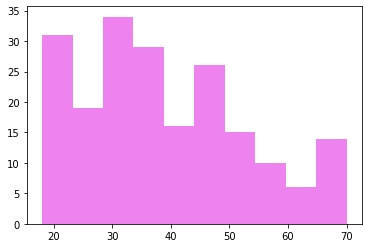

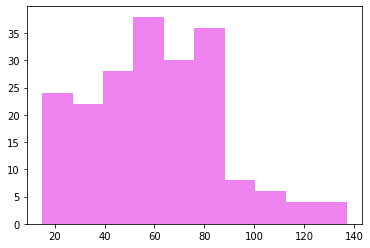

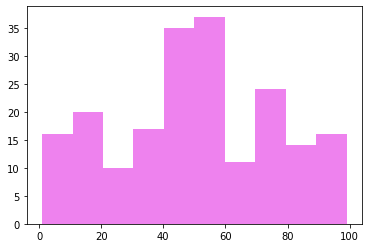

In [6]:
df.columns
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(df[col], color='violet')
    plt.show()

Boxplots

Text(0.5, 1.0, 'Columns Box Plot')

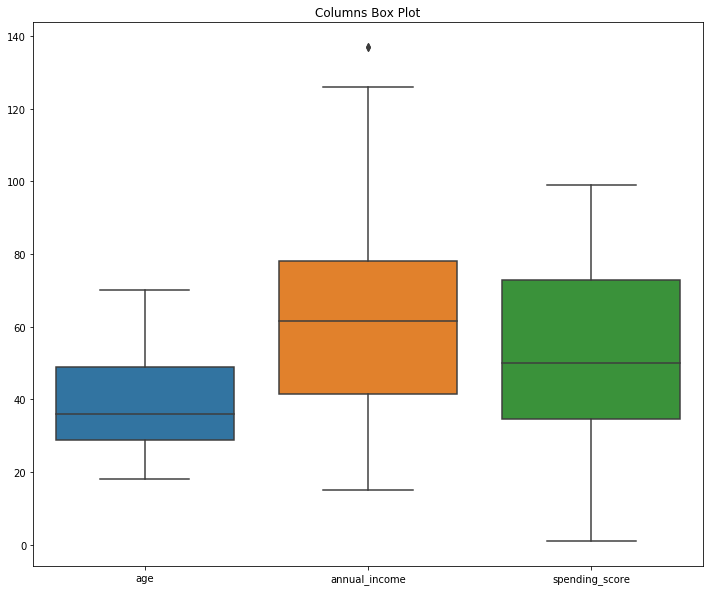

In [13]:
plt.figure(figsize=(12, 10))
sns.boxplot(data= df[['age', 'annual_income', 'spending_score']])
plt.title('Columns Box Plot')

In [8]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

Takeaway: no nulls in our data set

In [9]:
df['is_female']= (df.gender== 'Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [10]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate= train_test_split(train_and_validate, test_size=.15, random_state= 123)
print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)

train (144, 6)
test (30, 6)
validate (26, 6)


In [11]:
df=acquire.get_mall_data()

def prep_mall_data(df):
    '''Takes the acquired mall data, does data prep, and returns 
    train, test, validate data splits'''
    df['is_female']= (df.gender== 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate= train_test_split(train_and_validate, test_size=.15, random_state= 123)
    return train, test, validate

In [12]:
! git add 'wrangle.ip'

TypeError: prep_mall_data() missing 1 required positional argument: 'df'